In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [151]:
# Load the dataset
df = pd.read_csv(r'C:\Users\USER\Desktop\Projects\amazon.csv')

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Data Cleaning and Preparation

In [152]:
# Check Data types
print(df.dtypes)


product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [153]:
# Removing characters and converting the following data types to floats

# Replace '₹' and ',' from actual_price and discounted_price, and convert to float
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(float)

df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '')
df['discounted_price'] = df['discounted_price'].astype(float)

# Replace '%' from discount_percentage and convert to int
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = df['discount_percentage'].astype(float).fillna(0).astype(int)

# Replace ',' from rating_count, and convert to int
df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = df['rating_count'].astype(float).fillna(0).astype(int)

# Replace '|' with NaN and convert rating to float
df['rating'] = df['rating'].replace('|', np.nan)
df['rating'] = df['rating'].astype(float)

df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [154]:
# Check for missing data
missing_data = df.isnull().sum()
print("\nMissing Data:")
print(missing_data)


Missing Data:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [155]:
# Drop missing values
df = df.dropna(subset=['rating'])

# Check if missing values are dropped
missing_data = df.isnull().sum()
print("\nMissing Data:")
print(missing_data)


Missing Data:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


# Exploratory Data Analysis

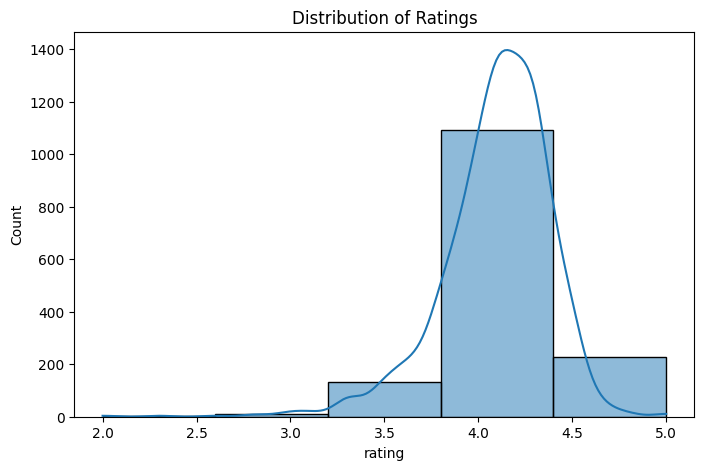

4.096584699453552

In [156]:
# Histogram of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.show()

# Overall Average Rating of All Products
df['rating'].mean()


The overall average and the skewness of the shape of the graph above suggests that most of Amazon products are well liked by customers and are top quality! 

But we need to look into this deeper. How does the average rating look like for each Category?

In [157]:
# Extracting only the main category and Creating a new category
df["Category"] = df["category"].str.split("|").str[0]

# Remove the original
df.drop("category", axis=1, inplace=True)

# Display unique values only
unique_categories = df["Category"].unique()

# Count of products in each category
category_count = df["Category"].value_counts()

# Display unique categories and count of products
print("Unique Categories:")
print(unique_categories)

print("\nCount of Products in Each Category:")
print(category_count)

# Grouping the Categories and calculating mean rating
category_avg = df.groupby("Category")["rating"].mean()
print("\nMean Rating for Each Category:")
print(category_avg)


Unique Categories:
['Computers&Accessories' 'Electronics' 'MusicalInstruments'
 'OfficeProducts' 'Home&Kitchen' 'HomeImprovement' 'Toys&Games'
 'Car&Motorbike' 'Health&PersonalCare']

Count of Products in Each Category:
Category
Electronics              526
Computers&Accessories    453
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

Mean Rating for Each Category:
Category
Car&Motorbike            3.800000
Computers&Accessories    4.154967
Electronics              4.081749
Health&PersonalCare      4.000000
Home&Kitchen             4.040716
HomeImprovement          4.250000
MusicalInstruments       3.900000
OfficeProducts           4.309677
Toys&Games               4.300000
Name: rating, dtype: float64


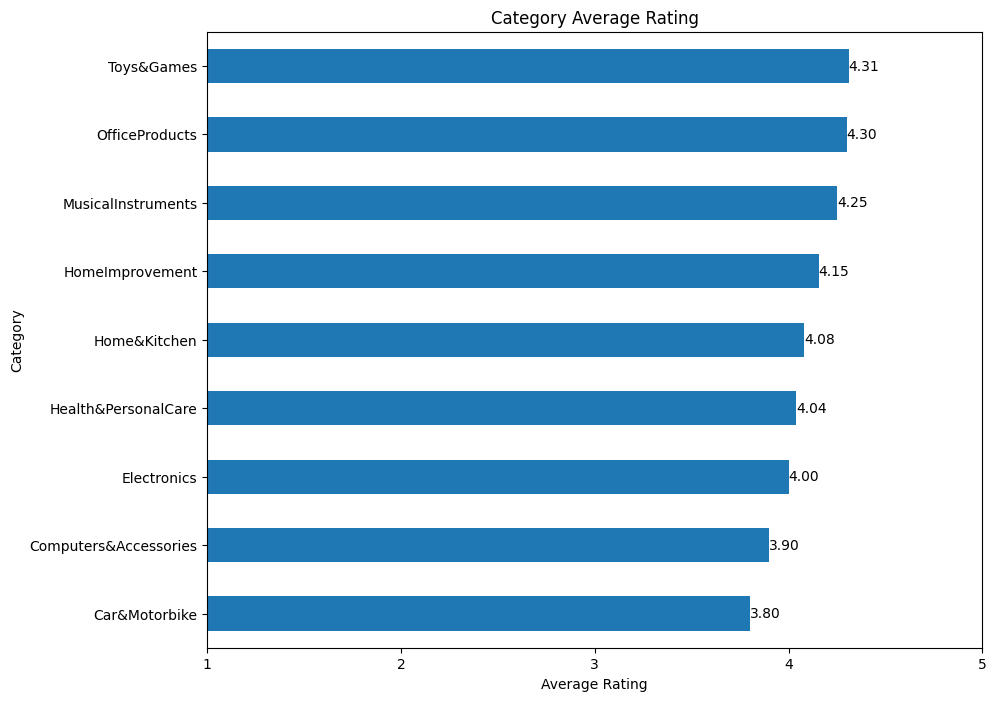

In [158]:
# Average rating of Products by Category 
plt.figure(figsize=(10, 8))
bars = category_avg.sort_values().plot(kind='barh')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Category Average Rating')
plt.xticks(range(1, 6))  
plt.xlim(1, 5)  # Set x-axis limits to match the rating scale
plt.yticks(range(len(category_avg)), category_avg.index)  # Set y-axis ticks to category names

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
             ha='left', va='center', color='black')

plt.show()


We now have the average ratings for each category and we know which are the highest rated categories! However, we noticed that even though Categories like Toys & Games, Office Products, Musical Instruments are highly rated but the number of products in these categories are not as diverse as there are in Categories like Electronics, Computers & Accessories and Home & Kitchen.

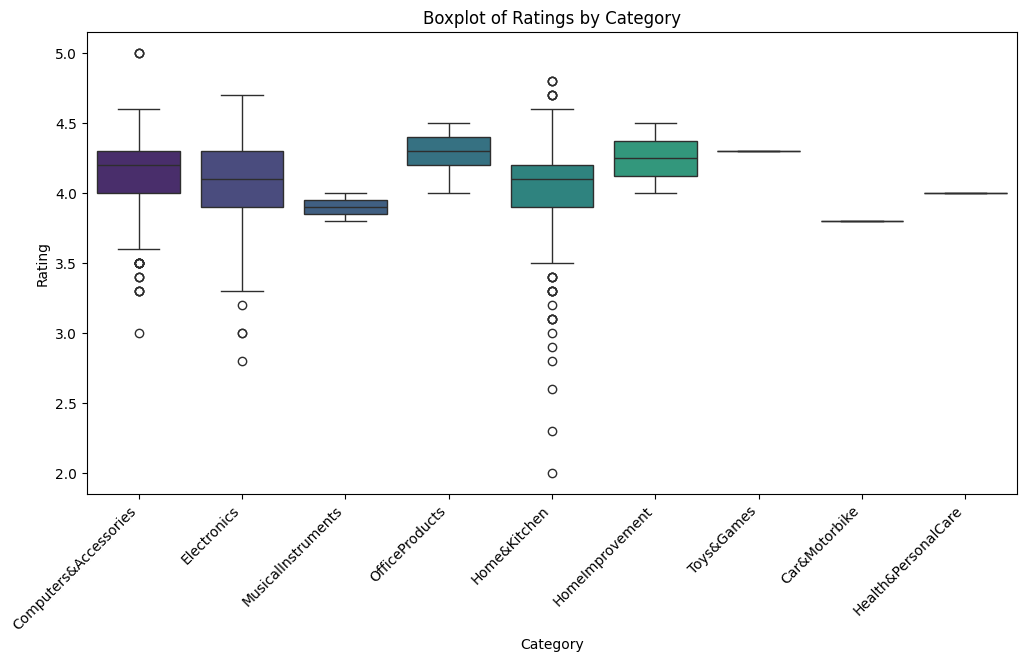

In [162]:
# Boxplot of Ratings by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='rating', data=df, palette='viridis', hue='Category', legend=False)
plt.title('Boxplot of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


The Boxplot gives us further details into the spread of the ratings for each product category. From the Boxplot we learn:
- More than half the users that bought products from each of these categories rated it above 3.75
- Electronics, Computers & Accessories and Home & Kitchen even though have 400 plus diverse products yet majority of the ratings lie between 3.9 and 4.25. Suggesting most products are well liked!
- Even so, the Home & Kitchen category seems to have a lot of Outliers in the lower ratings suggesting there may be quite a few products that may not be as well performing as we would like them to be.
- THe top performing category in terms of median rating, lowest outlier and spread is Computers & Accessories (minimum 100 products). 
- THe top performing category in terms of overall median rating, lowest outlier and spread is Office Products.

Now Let's find out if the rating is affected by Price or Discounts?

0.12164167545801735


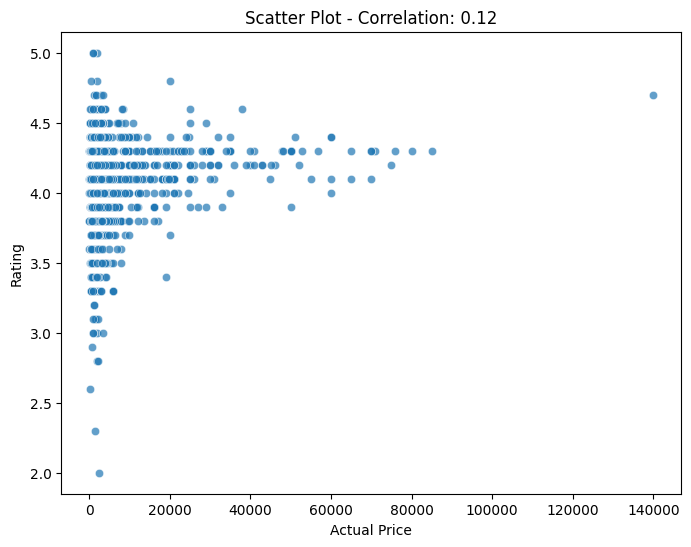

In [160]:
# Find correlation between actual_price and rating
correlation = df["actual_price"].corr(df["rating"])
print(correlation)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_price', y='rating', data=df, alpha=0.7)
plt.title(f'Scatter Plot - Correlation: {correlation:.2f}')
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.show()

From the value above and the shape of the scatter plot we can say there is no correlation between Actual Price and Ratings.

-0.15537543972693008


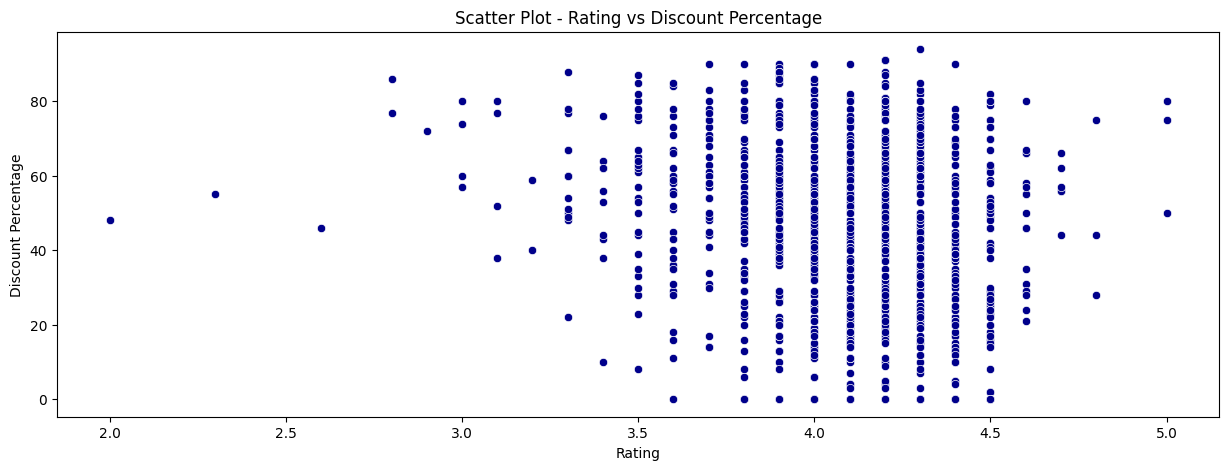

In [161]:
# Find correlation between discount_percentage and rating
correlation1 = df["discount_percentage"].corr(df["rating"])
print(correlation1)


# Scatter plot of discount_price against ratings
plt.figure(figsize=(15, 5))
sns.scatterplot(x='rating', y='discount_percentage', data=df, color='DarkBlue')
plt.title('Scatter Plot - Rating vs Discount Percentage')
plt.xlabel('Rating')
plt.ylabel('Discount Percentage')
plt.show()

From the value above and the shape of the scatter plot we can say there is no correlation between Discount Percentage and Ratings.

Based on the results above it seems the ratings are unaffected by prices or discounts and are purely a reflection of the quality of a product!